# Heart Disease Analysis Notebook

This notebook is designed to analyze a dataset related to heart disease. The dataset includes various features such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak, ST slope, and the target variable indicating the presence of heart disease.

The analysis includes data loading, exploration, visualization, and some preprocessing steps to understand the dataset better and prepare it for further machine learning tasks.

In [1]:
import kagglehub
path = kagglehub.dataset_download("sid321axn/heart-statlog-cleveland-hungary-final")
print(path)

100%|██████████| 9.55k/9.55k [00:00<00:00, 10.2MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/sid321axn/heart-statlog-cleveland-hungary-final/versions/1


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

## Data Loading and Initial Exploration

The first step in any data analysis project is to load the dataset and perform an initial exploration to understand its structure and contents. This includes checking for missing values, understanding the data types of each column, and getting a sense of the distribution of the data.

### Key Steps:
- **Loading the Dataset**: The dataset is loaded from a CSV file.
- **Checking for Missing Values**: We verify if there are any missing values in the dataset.
- **Data Types and Summary**: We inspect the data types of each column and get a summary of the dataset.

In [3]:
file_path = f"{path}/heart_statlog_cleveland_hungary_final.csv"
df = pd.read_csv(file_path)

In [4]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


## Data Visualization

Visualization is a crucial step in data analysis as it helps in understanding the distribution of different features and their relationships. In this section, we create various plots to visualize the distribution of key features such as sex, target (presence of heart disease), and chest pain type.

### Key Visualizations:
- **Distribution of Sex**: A pie chart showing the distribution of male and female patients.
- **Distribution of Target**: A pie chart showing the distribution of patients with and without heart disease.
- **Distribution of Chest Pain Type**: A pie chart showing the distribution of different types of chest pain.

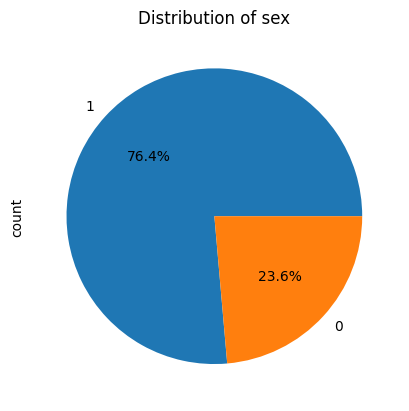

In [6]:
df['sex'].value_counts().plot(kind="pie", autopct='%1.1f%%', color='blue')
plt.title('Distribution of sex')
plt.show()

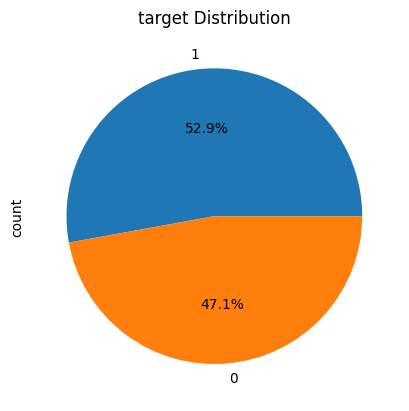

In [7]:
df['target'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('target Distribution')
plt.show()

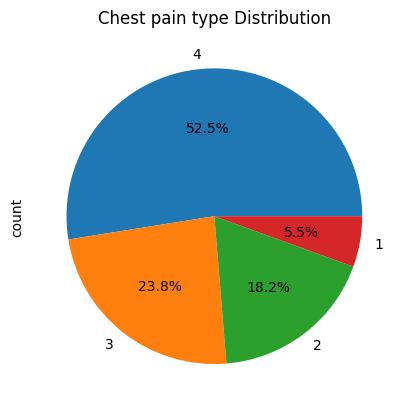

In [8]:
df['chest pain type'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('Chest pain type Distribution')
plt.show()

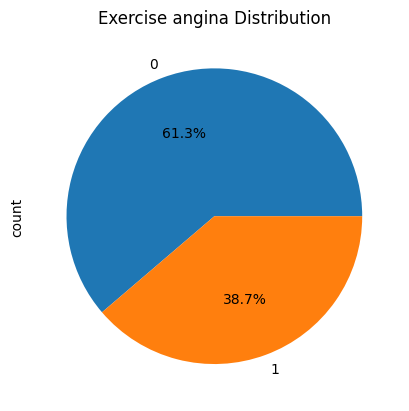

In [9]:
df['exercise angina'].value_counts().plot(kind='pie',autopct = '%1.1f%%')
plt.title('Exercise angina Distribution')
plt.show()

In [10]:
y = df['target']
X = df.drop('target',axis = 1)

## Feature Selection

Feature selection is a critical step in building an effective machine learning model. It involves selecting the most relevant features that contribute to the prediction of the target variable.

- **Feature Selection**: Using techniques like mutual information to select the most relevant features.



In [11]:
discrete_features_names = ['chest pain type', 'sex', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
discrete_features=[X.columns.get_loc(col) for col in discrete_features_names]
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)

In [12]:
for i in range(len(discrete_features_names)):
  print(discrete_features_names[i]," : ",mi_scores[i])

chest pain type  :  0.04110561091690368
sex  :  0.0498594697332177
fasting blood sugar  :  0.14989325283030486
resting ecg  :  0.053860778737144566
exercise angina  :  0.10988994874515612
ST slope  :  0.024377705392662513


In [13]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [14]:
continuous_columns = ['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
mi_scores_cont = mutual_info_regression(X[continuous_columns], y)

In [15]:
for i in range(len(continuous_columns)):
  print(continuous_columns[i]," : ",mi_scores_cont[i])

resting bp s  :  0.040276428142123955
cholesterol  :  0.10694611553082467
max heart rate  :  0.12990191025881792
oldpeak  :  0.11398960815273185


## Data Preprocessing

Before applying machine learning models, it's essential to preprocess the data. This includes handling missing values, encoding categorical variables, and scaling numerical features.

### Key Steps:
- **Encoding Categorical Variables**: If there are categorical variables, they need to be encoded into numerical values.
- **Scaling Numerical Features**: Scaling ensures that all numerical features contribute equally to the model's performance.

In [16]:
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
print("Scaled Numerical Features:")
print(X[numerical_cols].head())

Scaled Numerical Features:
        age  resting bp s  cholesterol  max heart rate   oldpeak
0  0.244898          0.70     0.479270        0.788732  0.295455
1  0.428571          0.80     0.298507        0.676056  0.409091
2  0.183673          0.65     0.469320        0.267606  0.295455
3  0.408163          0.69     0.354892        0.338028  0.465909
4  0.530612          0.75     0.323383        0.436620  0.295455


- **Train-Test Split**: Splitting the dataset into training and testing sets to evaluate the model's performance.
- **Model Selection**: Choosing appropriate machine learning models for classification tasks.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
heart_model = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss',
    learning_rate=0.05,
    max_depth=9,
    n_estimators=500
)

heart_model.fit(X_train, Y_train)

y_pred = heart_model.predict(X_test)
y_pred_proba = heart_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(Y_test, y_pred_proba))

Confusion Matrix:
[[134  20]
 [ 12 191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       154
           1       0.91      0.94      0.92       203

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357


ROC-AUC Score:
0.9516665600409443


In [23]:
import pickle
with open('heart_model.pkl', 'wb') as f:
    pickle.dump(heart_model, f)